In [1]:
import pandas as pd
import numpy as np
import sys
df=pd.read_csv('amazon.csv',thousands='.')
df.head(12)

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
5,2003,Acre,Janeiro,10,2003-01-01
6,2004,Acre,Janeiro,0,2004-01-01
7,2005,Acre,Janeiro,12,2005-01-01
8,2006,Acre,Janeiro,4,2006-01-01
9,2007,Acre,Janeiro,0,2007-01-01


In [2]:
df.shape

(6454, 5)

In [3]:
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
5,2003,Acre,Janeiro,10,2003-01-01
6,2004,Acre,Janeiro,0,2004-01-01
7,2005,Acre,Janeiro,12,2005-01-01
8,2006,Acre,Janeiro,4,2006-01-01
9,2007,Acre,Janeiro,0,2007-01-01


In [4]:
df.describe()


,year,number
count,6454.000000,6454.000000
mean,2007.461729,522.696312
std,5.746654,1554.846486
min,1998.000000,0.000000
25%,2002.000000,9.000000
50%,2007.000000,54.000000
75%,2012.000000,269.000000
max,2017.000000,25963.000000


In [5]:

df.isna().sum()


year      0
state     0
month     0
number    0
date      0
dtype: int64

In [6]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


In [7]:
df.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2002-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [8]:
fire_per_month=df.groupby('month')['number'].sum()


In [9]:
months_unique = list(df.month.unique())
fire_per_month = fire_per_month.reindex(months_unique, axis=0)
fire_per_month

month
Janeiro        52587
Fevereiro      30952
Mar�o          35118
Abril          28364
Maio           46083
Junho         111405
Julho         217620
Agosto        740841
Setembro     1015925
Outubro       629665
Novembro      312326
Dezembro      152596
Name: number, dtype: int64

In [10]:
fire_per_month

month
Janeiro        52587
Fevereiro      30952
Mar�o          35118
Abril          28364
Maio           46083
Junho         111405
Julho         217620
Agosto        740841
Setembro     1015925
Outubro       629665
Novembro      312326
Dezembro      152596
Name: number, dtype: int64

In [11]:
fire_per_month=fire_per_month.to_frame()
fire_per_month.reset_index(level=0, inplace=True)

In [24]:
fire_per_month

,month,number
0,Janeiro,52587
1,Fevereiro,30952
2,Mar�o,35118
3,Abril,28364
4,Maio,46083
5,Junho,111405
6,Julho,217620
7,Agosto,740841
8,Setembro,1015925
9,Outubro,629665


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

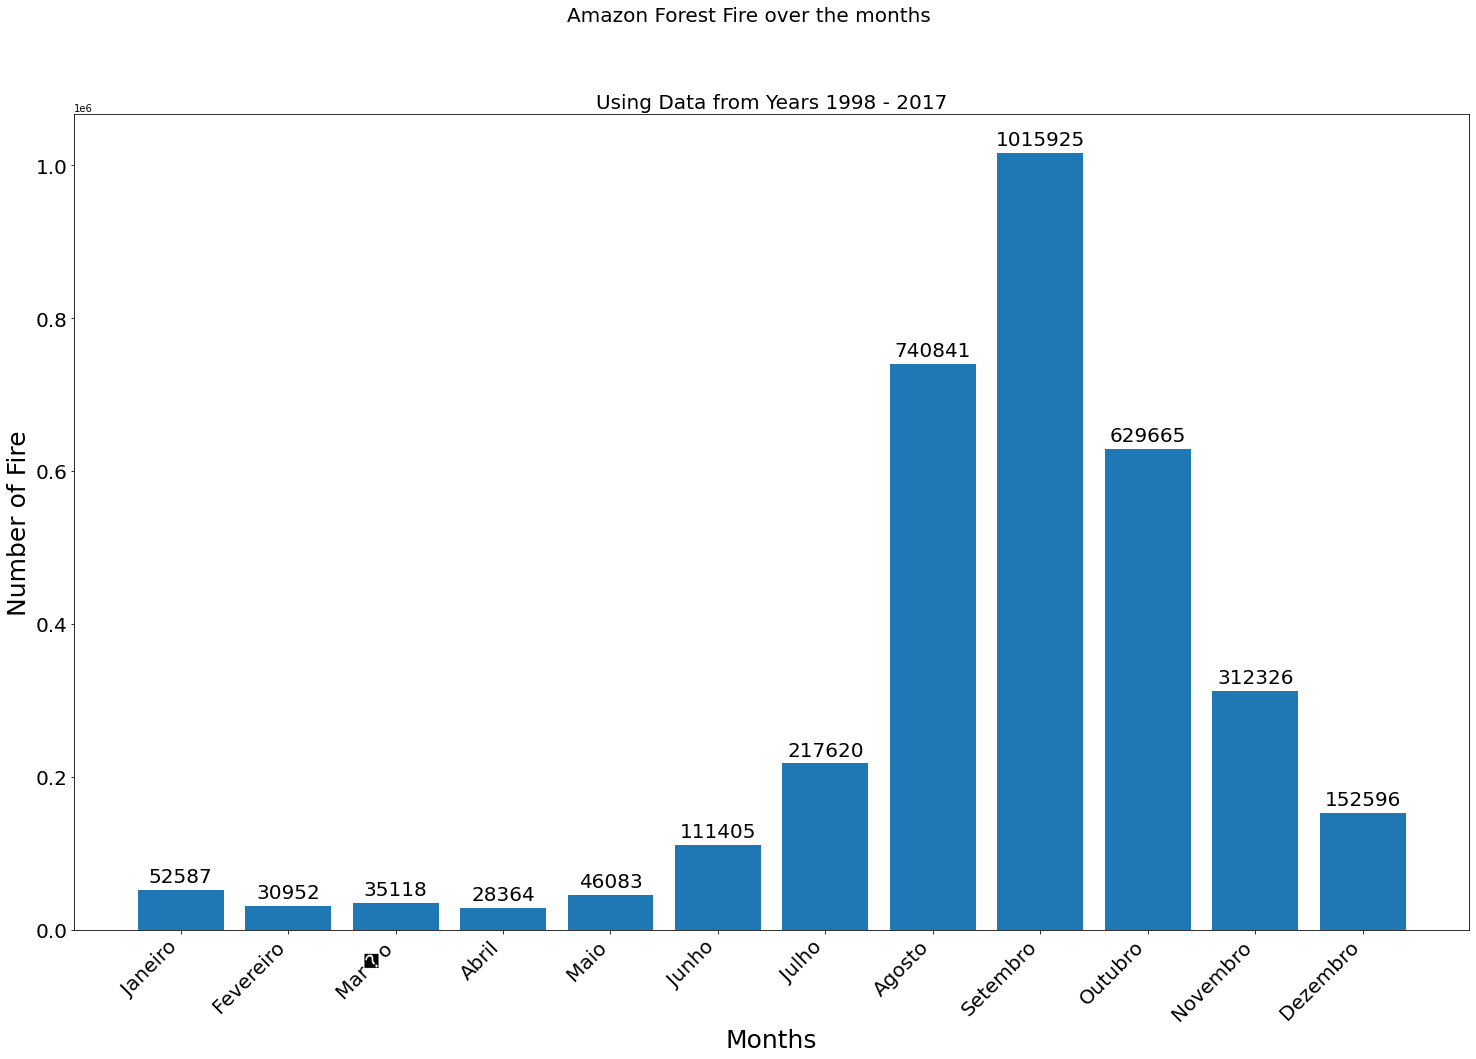

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
plt.bar(fire_per_month['month'],fire_per_month['number'])

plt.suptitle('Amazon Forest Fire over the months',fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)
plt.xlabel('Months',fontsize=25)
plt.ylabel('Number of Fire',fontsize=25)
for i,num in enumerate(fire_per_month['number']):
    plt.text(i,num+10000,num,ha='center',fontsize=20)
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)
